# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns

In [4]:
# Loading Data
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DLAssignments/compresive_strength_concrete/compresive_strength_concrete.csv")

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [9]:
# Renaming Columns
columns = {
    'Cement (component 1)(kg in a m^3 mixture)':'Cement',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnance_Slag',
    'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
    'Water  (component 4)(kg in a m^3 mixture)':'Water',
    'Superplasticizer (component 5)(kg in a m^3 mixture)':'Super_Plasticizer',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse_Aggregate',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
    'Age (day)':'Age',
    'Concrete compressive strength(MPa, megapascals) ':'Concrete_Strength'
    }
  
df.rename(columns = columns, inplace=True)

In [10]:
df.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


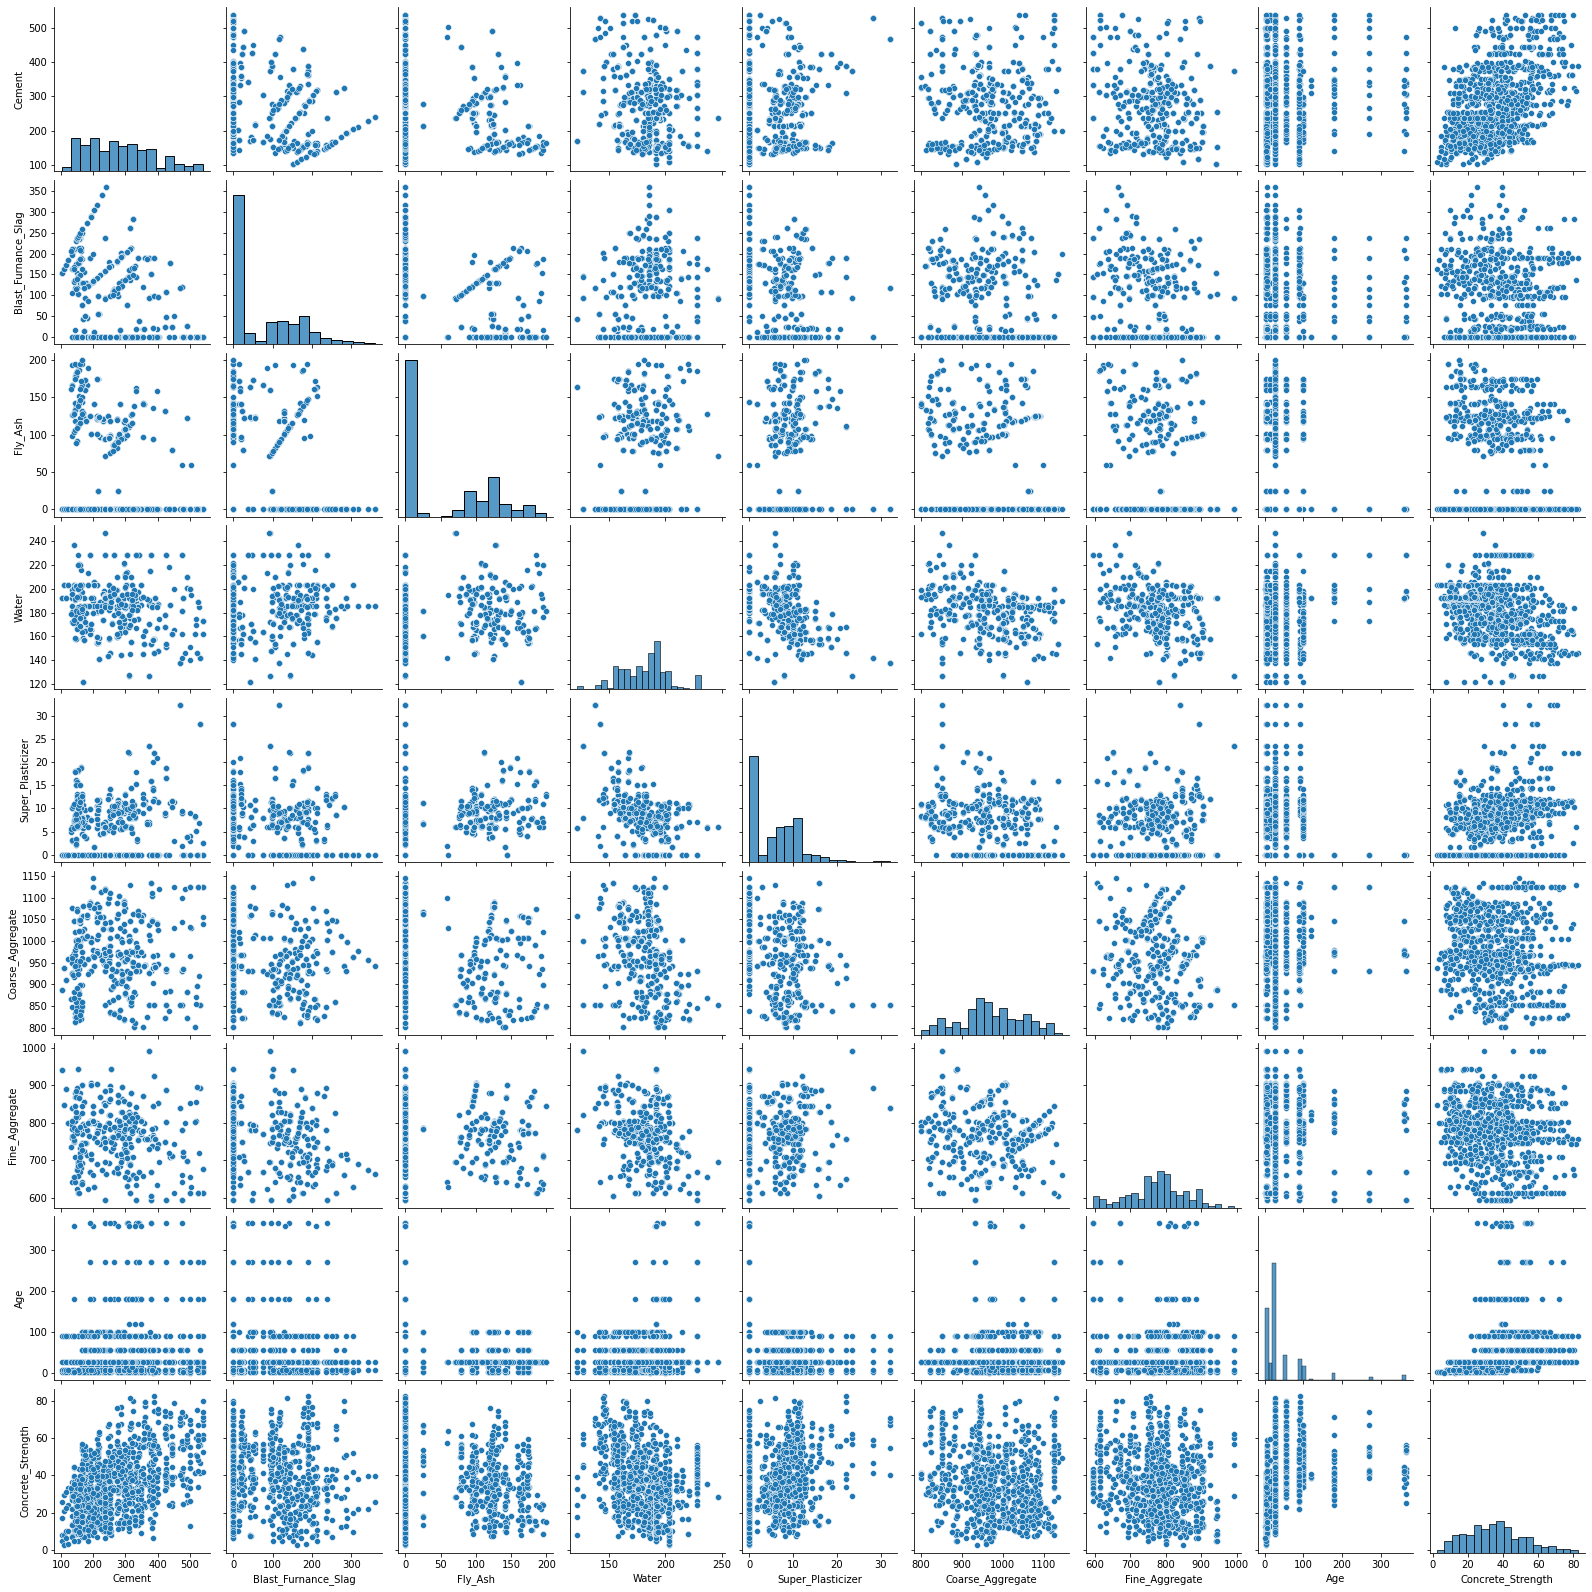

In [11]:
# Plotting Relations Between Features
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


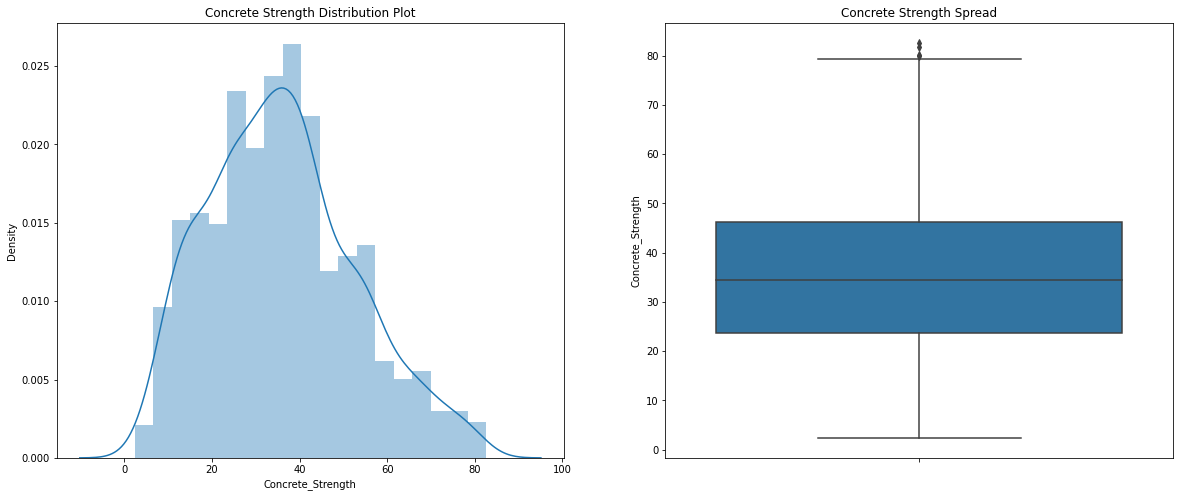

In [12]:
# Visualizing The Data
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Concrete Strength Distribution Plot')
sns.distplot(df.Concrete_Strength)

plt.subplot(1,2,2)
plt.title('Concrete Strength Spread')
sns.boxplot(y=df.Concrete_Strength)

plt.show()

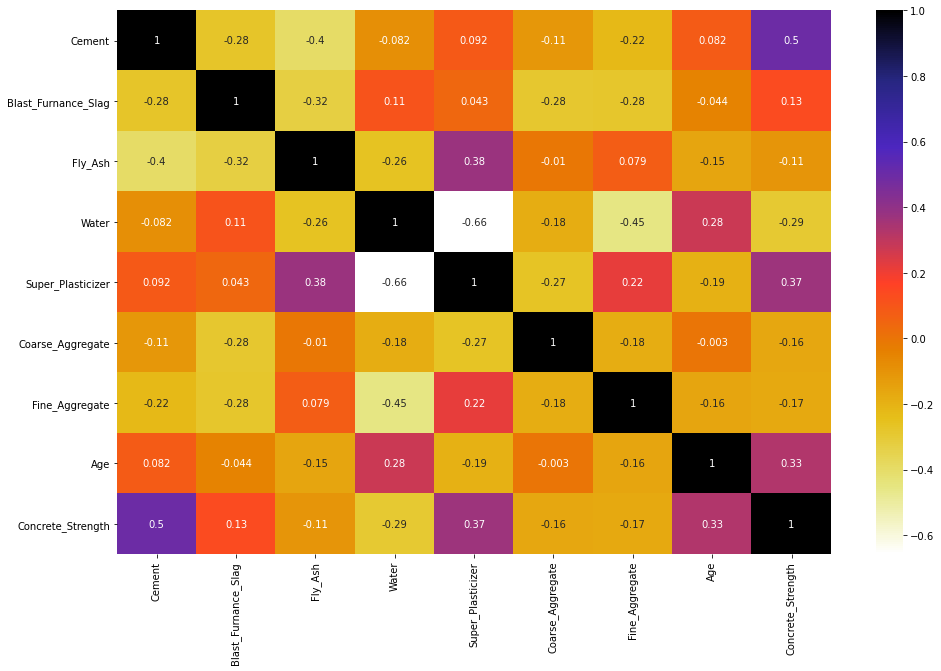

In [13]:
# Making A HeatMap of Correlations
correlations = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(correlations, cmap="CMRmap_r", annot = True)
plt.show()

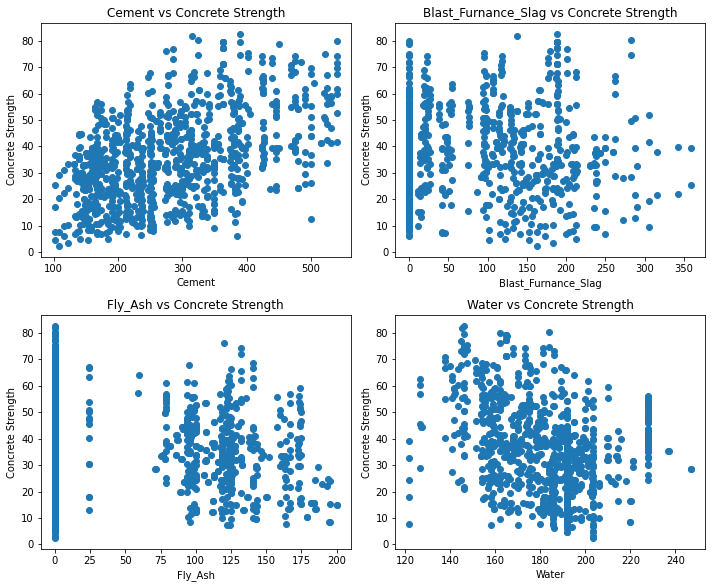

In [14]:

# Plotting Some Important Numerical Features
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Concrete_Strength'])
    plt.title(x+' vs Concrete Strength')
    plt.ylabel('Concrete Strength')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Cement', 1)
scatter('Blast_Furnance_Slag', 2)
scatter('Fly_Ash', 3)
scatter('Water', 4)

plt.tight_layout()

In [15]:
# Shuffling Data
df = df.sample(frac=1)

In [16]:
df.shape

(1030, 9)

In [17]:
# Splitting The Dataset Into Testing and Training Data
train_data = df.iloc[:721,:]
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
894,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,29.72
214,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,3,9.45
791,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,180,41.05
707,200.0,133.0,0.0,192.0,0.0,965.4,806.2,90,43.25
839,153.0,239.0,0.0,200.0,6.0,1002.0,684.0,28,26.86


In [18]:
train_data.shape

(721, 9)

In [19]:
test_data = df.iloc[721:,:]
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Strength
335,275.1,0.0,121.4,159.5,9.9,1053.6,777.5,14,38.77
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,90,39.36
761,350.0,0.0,0.0,203.0,0.0,974.0,775.0,90,31.35
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [20]:
test_data.shape

(309, 9)

In [21]:
# Separating Features From Test And Train Data
copy_of_train_data = train_data.copy()
copy_of_test_data = test_data.copy()
train_labels = train_data.pop('Concrete_Strength')
test_labels = test_data.pop('Concrete_Strength')

In [22]:
train_labels.head()

894    29.72
214     9.45
791    41.05
707    43.25
839    26.86
Name: Concrete_Strength, dtype: float64

In [23]:
test_labels.head()

335     38.77
8       45.85
16      39.36
761     31.35
1028    32.77
Name: Concrete_Strength, dtype: float64

In [24]:
# Normalizing The Data

# Finding Mean
train_mean = np.mean(train_data, axis = 0)
# Finding Standard Deviation
train_std = np.std(train_data, axis = 0)
# Formula Used: Data - Mean / Satandard Deviation
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [25]:
# Checking Normalized Train Data
train_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
894,-1.328712,1.117028,1.389696,0.455339,0.286483,-0.095498,-1.634190,-0.290630
214,-0.873421,-0.850245,1.112621,-0.899211,0.599768,1.461046,0.330462,-0.670597
791,0.654164,-0.850245,-0.836245,0.501887,-1.032614,0.932772,0.372316,2.019569
707,-0.780052,0.697964,-0.836245,0.501887,-1.032614,-0.116064,0.374778,0.651688
839,-1.232456,1.931876,-0.836245,0.874272,-0.043291,0.354370,-1.129486,-0.290630


In [26]:

# Checking Normalized Test Data
test_data.head()

,Cement,Blast_Furnance_Slag,Fly_Ash,Water,Super_Plasticizer,Coarse_Aggregate,Fine_Aggregate,Age
335,-0.057169,-0.850245,1.053470,-1.010927,0.599768,1.017605,0.021485,-0.503411
8,-0.144762,0.476791,-0.836245,2.177619,-1.032614,-0.545367,-1.301824,-0.290630
16,-1.361439,1.587312,-0.836245,0.501887,-1.032614,0.932772,0.383395,0.651688
761,0.663789,-0.850245,-0.836245,1.013916,-1.032614,-0.005525,-0.009290,0.651688
1028,-1.173740,1.323068,-0.836245,-0.261502,0.830610,0.194988,0.161817,-0.290630


In [27]:
# Making Base Model

model = tf.keras.models.Sequential()
model.add(Dense(12, activation = 'relu', input_shape=[len(train_data.keys())]))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(6, activation = 'sigmoid'))
model.add(Dense(1,))
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


In [28]:

# Training Model on Train Data
history = model.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split= 0.2)

In [29]:
# Feeding History In DataFrame 
history_df = pd.DataFrame(history.history)
history_df['epochs'] = history.epoch
history_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,898.553955,898.553955,25.453163,950.092346,950.092346,25.436163,95
96,893.202637,893.202637,25.355721,944.699585,944.699585,25.342354,96
97,887.868713,887.868713,25.258219,939.360474,939.360474,25.249084,97
98,882.463928,882.463928,25.160992,933.959717,933.959717,25.154331,98
99,877.196411,877.196411,25.062180,928.716064,928.716064,25.061934,99


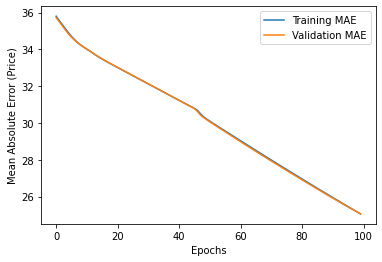

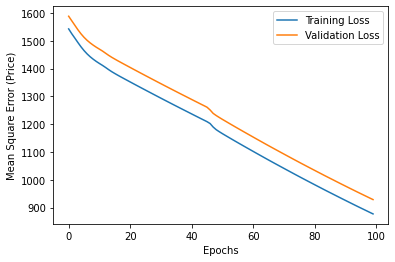

In [30]:

# plotting loss on validation data
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Price)')
  plt.plot(history_df['epochs'], history_df['mae'], label = 'Training MAE')
  plt.plot(history_df['epochs'], history_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Price)')
  plt.plot(history_df['epochs'], history_df['loss'], label = 'Training Loss')
  plt.plot(history_df['epochs'], history_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_df)

In [31]:
# Making Predictions on Test Data
predictions = model.predict(test_data).flatten()
predictions = predictions.flatten()

In [32]:
test_score = model.evaluate(test_data, test_labels)
test_score

10/10 [==============================] - 0s 2ms/step - loss: 900.8924 - mse: 900.8924 - mae: 24.9568


[900.8923950195312, 900.8923950195312, 24.956771850585938]

In [33]:
print(f"Mean Squared Error: {test_score[0]}")
print(f"Mean Absolute Error: {test_score[1]}")

Mean Squared Error: 900.8923950195312
Mean Absolute Error: 900.8923950195312


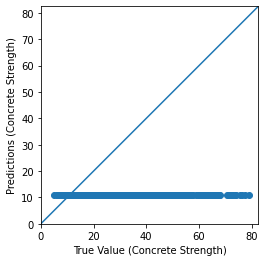

In [34]:
# Making Price Predictions On Test Data

plt.scatter(test_labels, predictions)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

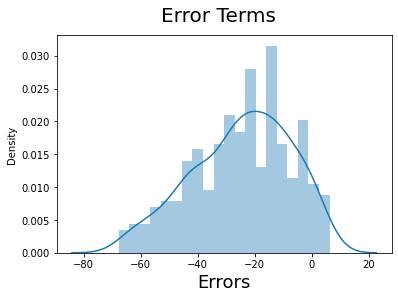

In [35]:
# Plotting Difference Between Actual Values And Predicted Values

fig = plt.figure()
sns.distplot((predictions - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [36]:
#Making Second Model For Validation Data
from tensorflow.keras.models import Sequential
model2 = Sequential()
# model2.add(Dense(10, activation='relu', input_shape = (22,)))
# model2.add(Dense(8, activation='relu'))
# model2.add(Dense(6, activation='relu'))
model2.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(64, activation = 'relu'))
model2.add(Dense(1))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [37]:
history_1 = model2.fit(train_data, train_labels, epochs=500, verbose = 0, validation_split=0.2)

In [38]:
# Feeding history_1 In DataFrame
history_1_df = pd.DataFrame(history_1.history)
history_1_df['epochs'] = history_1.epoch
history_1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
495,8.448501,8.448501,2.045143,38.587719,38.587719,3.971476,495
496,7.546978,7.546978,1.940929,42.376293,42.376293,4.435147,496
497,7.470649,7.470649,1.973285,41.299881,41.299881,4.311945,497
498,7.744801,7.744801,2.009727,38.760143,38.760143,4.032623,498
499,8.410969,8.410969,2.068018,37.330479,37.330479,3.914568,499


In [39]:
predictions1 = model2.predict(test_data)
predictions1 = predictions1.flatten()
predictions1.shape

(309,)

In [40]:
test1_score = model2.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 35.3476 - mse: 35.3476 - mae: 4.2287


In [41]:
print(f"Loss: {test1_score[0]}")
print(f"Mean Absolute Error: {test1_score[2]}")

Loss: 35.34761047363281
Mean Absolute Error: 4.228745460510254


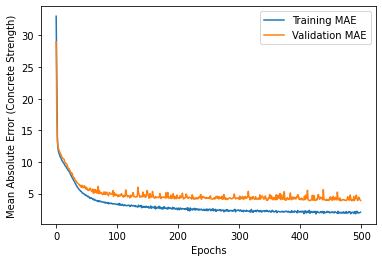

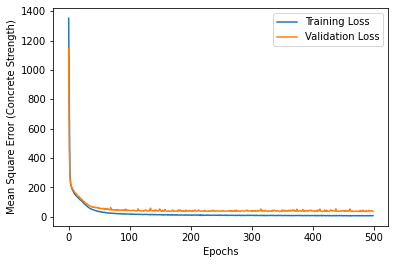

In [42]:

# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['mae'], label = 'Training MAE')
  plt.plot(history_1_df['epochs'], history_1_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_1_df['epochs'], history_1_df['loss'], label = 'Training Loss')
  plt.plot(history_1_df['epochs'], history_1_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_1_df)

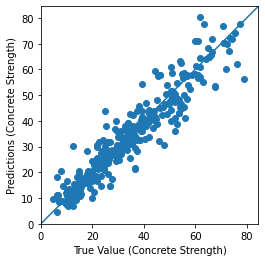

In [43]:

plt.scatter(test_labels, predictions1)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

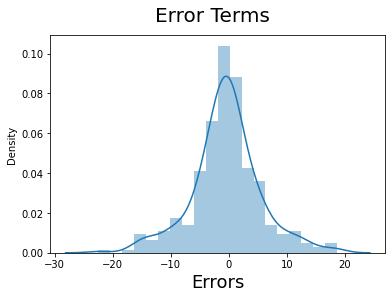

In [44]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions1 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [45]:
# Overcoming Overfitting 
from tensorflow.keras.callbacks import EarlyStopping
overcome = EarlyStopping(monitor = 'val_loss', patience = 10)

In [46]:

# Building Third Model

from tensorflow.keras.models import Sequential
model3 = Sequential()
model3.add(Dense(64, activation = 'relu', input_shape = [len(train_data.keys())]))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(64, activation = 'sigmoid'))
model3.add(Dense(1,))
optimizer = tf.keras.optimizers.RMSprop(0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mse','mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [47]:

history_2 = model3.fit(train_data, train_labels, epochs=100, verbose = 0, validation_split = 0.2)

In [48]:

history_2_df = pd.DataFrame(history_2.history)
history_2_df['epochs'] = history_2.epoch
history_2_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epochs
95,37.607910,37.607910,4.563799,55.573456,55.573456,5.329527,95
96,36.759693,36.759693,4.522085,54.623028,54.623028,5.370124,96
97,36.874657,36.874657,4.555751,55.836754,55.836754,5.484104,97
98,35.216461,35.216461,4.464076,54.728416,54.728416,5.387932,98
99,34.915806,34.915806,4.423881,55.083157,55.083157,5.538581,99


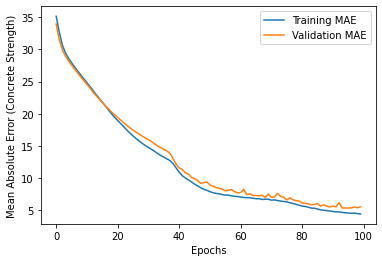

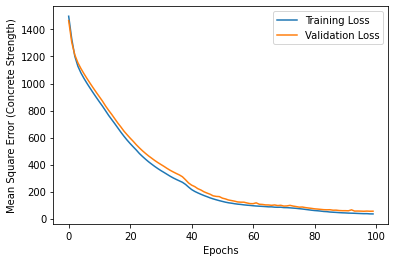

In [49]:
# Plotting Validation Loss After Overcoming Overfitting
# Plotting Loss
def history_plot(history):
  # For Mean Absolute Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['mae'], label = 'Training MAE')
  plt.plot(history_2_df['epochs'], history_2_df['val_mae'], label = 'Validation MAE')
  plt.legend()
  # For Mean Squared Error
  plt.figure()
  plt.xlabel('Epochs')
  plt.ylabel('Mean Square Error (Concrete Strength)')
  plt.plot(history_2_df['epochs'], history_2_df['loss'], label = 'Training Loss')
  plt.plot(history_2_df['epochs'], history_2_df['val_mse'], label = 'Validation Loss')
  plt.legend()

history_plot(history_2_df)

In [50]:
predictions3 = model3.predict(test_data)
predictions3 = predictions3.flatten()

print(predictions3.shape)
print(test_labels.shape)

(309,)
(309,)


In [51]:
test2_score  = model3.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 51.4146 - mse: 51.4146 - mae: 5.2980


In [52]:
print(f"Loss: {test2_score[0]}")
print(f"Mean Absolute Error: {test2_score[2]}")

Loss: 51.414573669433594
Mean Absolute Error: 5.298000335693359


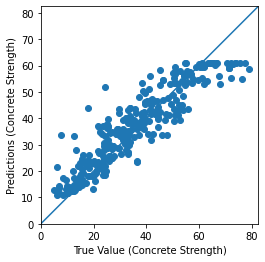

In [53]:
plt.scatter(test_labels, predictions3)
plt.xlabel('True Value (Concrete Strength)')
plt.ylabel('Predictions (Concrete Strength)')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.xlim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

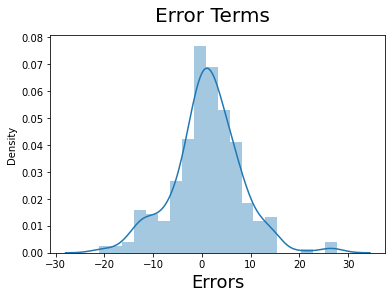

In [54]:
# Plotting Difference Between Actual Values And Predicted Values
fig = plt.figure()
sns.distplot((predictions3 - test_labels), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [55]:

# Saving Appropriate Model
model3.save('ConcreteStrengthModel.h5')

In [56]:
# Saving Model In CSV File
from google.colab import files
df.to_csv('Concrete_Strength_Assignment.csv', index=False)
files.download('Concrete_Strength_Assignment.csv')
print("Your File Was Saved Successfully!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your File Was Saved Successfully!
